# Representação de dados


## Leitura de arquivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv('../Dados/wine-reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [3]:
df.isna().sum(axis=0)

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [6]:
df = df.sort_values('country')
df.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [7]:
df.sample(2)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
90282,US,The fine tannins and perfect acidity give stru...,Estate,93,50.0,California,Anderson Valley,Mendocino/Lake Counties,Pinot Noir,Toulouse
83213,Portugal,Smooth Chardonnay-like richness gives concentr...,Branco Reserva,90,50.0,Douro,NaN,NaN,Portuguese White,Quinta do Vallado


In [8]:
df.describe().round(2)

,points,price
count,150930.00,137235.00
mean,87.89,33.13
std,3.22,36.32
min,80.00,4.00
25%,86.00,16.00
50%,88.00,24.00
75%,90.00,40.00
max,100.00,2300.00


In [9]:
df.groupby('variety').mean().sort_values('price', ascending=False).head(10).round(2)

,points,price
variety,,
Cabernet-Shiraz,96.00,150.00
Muscadel,92.90,141.30
Mazuelo,88.00,98.50
Tinto Fino,89.91,83.12
Mission,90.57,82.57
Tokay,93.29,82.12
Carignan-Syrah,92.00,80.00
Champagne Blend,90.00,78.63
Debit,86.67,72.33


## Gráficos

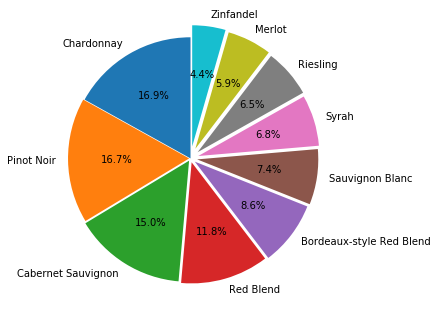

In [10]:
x = pd.value_counts(df['variety'])
cat = x[:10].index.values
freq = x[:10].values

np.append(cat, 'Others')
np.append(freq, np.sum(x[10:]))

plt.figure(figsize=(6,6))
plt.pie(freq, labels=cat, explode=np.linspace(0,0.1,10),startangle=90,autopct='%1.1f%%')
#plt.show()
plt.tight_layout()
plt.savefig('pie.pdf', dpi=300, format='pdf')

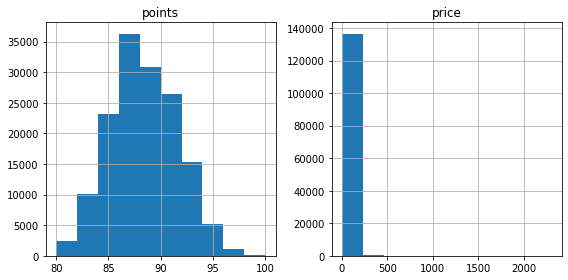

In [11]:
df[['points','price']].hist(figsize=(8,4))
#plt.show()
plt.tight_layout()
plt.savefig('hist.pdf', dpi=300, format='pdf')

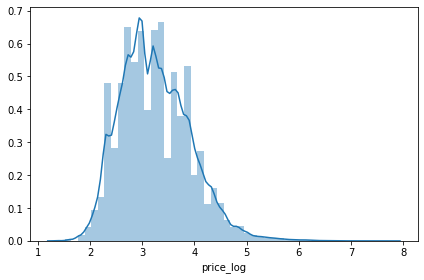

In [12]:
df['price_log'] = np.log(df['price'])
sns.distplot(df['price_log'].dropna())
#plt.show()
plt.tight_layout()
plt.savefig('dist.pdf', dpi=300, format='pdf')

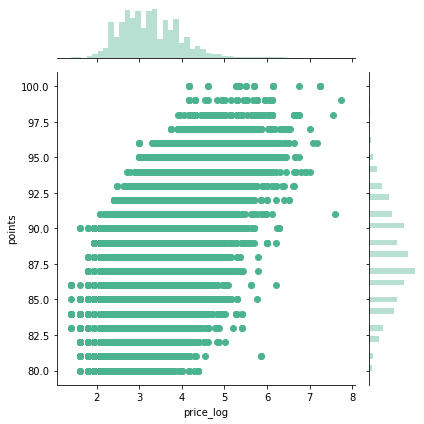

In [14]:
sns.jointplot('price_log', 'points', color="#4CB391", data=df)
#plt.show()

plt.tight_layout()
plt.savefig('joint.jpg', dpi=300, format='jpg')

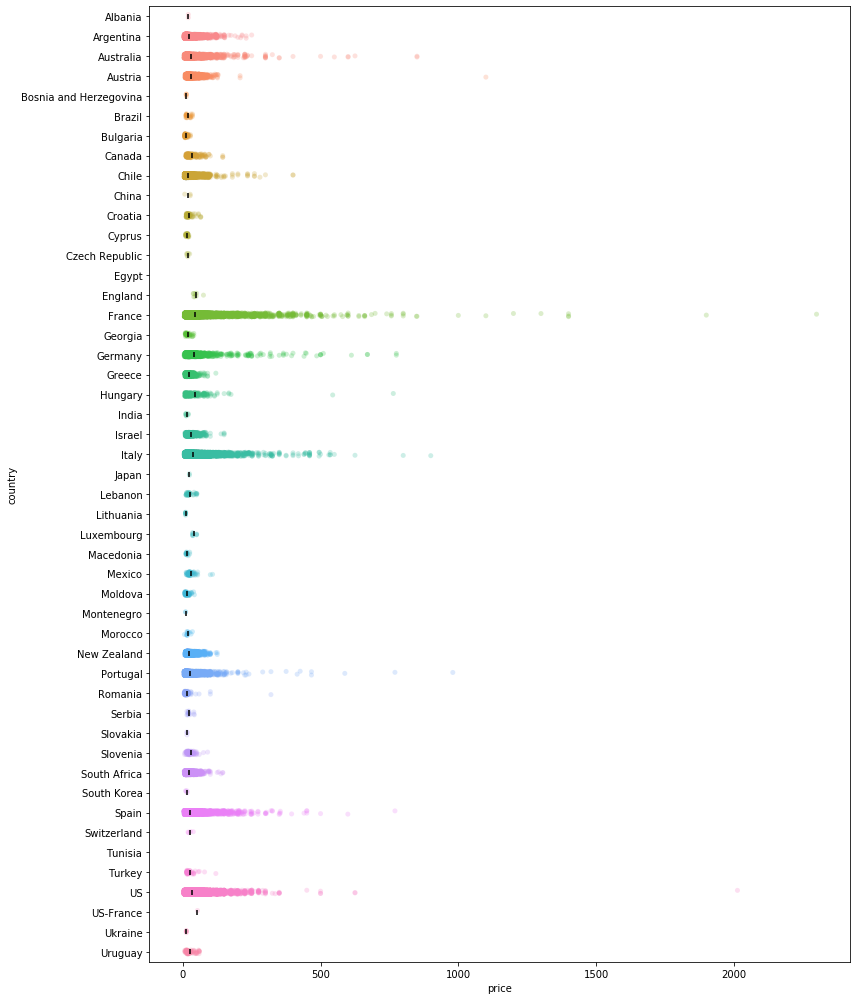

In [16]:
plt.figure(figsize=(12,14))

sns.stripplot(x="price", y="country", #hue="country",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

sns.pointplot(x="price", y="country", #hue="country",
              data=df, dodge=.532, join=False, color='k',#palette="dark",
              markers="|", scale=.75, ci=None)
#plt.show()


plt.tight_layout()
plt.savefig('strip.jpg', dpi=300, format='jpg')

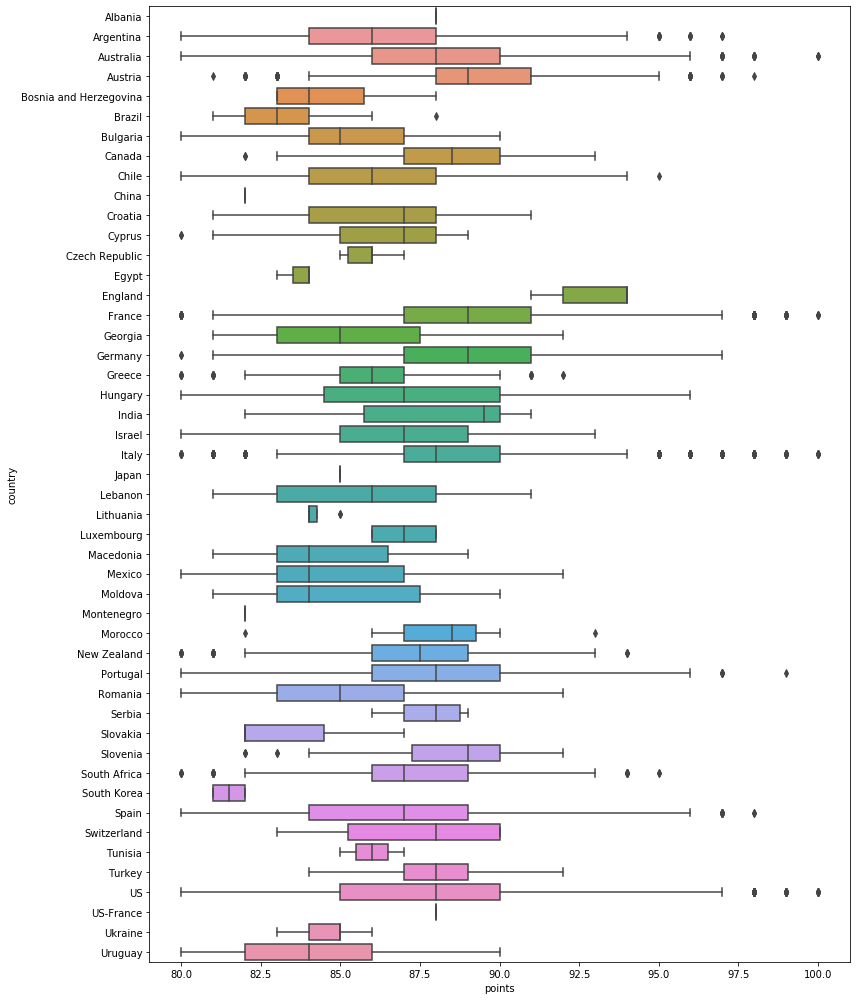

In [17]:
plt.figure(figsize=(12,14))
sns.boxplot(x='points',y='country',data=df)
#plt.show()

plt.tight_layout()
plt.savefig('box.pdf', dpi=300, format='pdf')